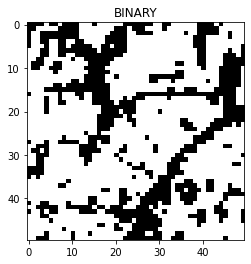

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Thresholding image
#source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
img = cv2.imread('overlapping_scales.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) - this conversion does not allow distance transform to work
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) #adjust second parameter for different results
plt.imshow(thresh, 'gray')
plt.title('BINARY')
plt.show()

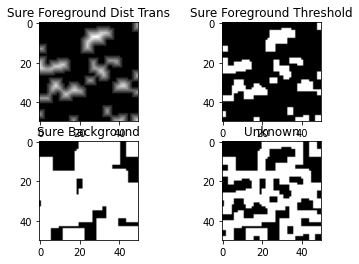

In [26]:
#Finding sure background and foreground
#source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
#adjust second parameter for different results (original tutorial had 0.7)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(2, 2, 1), plt.imshow(dist_transform, 'gray')
plt.title('Sure Foreground Dist Trans')
plt.subplot(2, 2, 2), plt.imshow(sure_fg, 'gray')
plt.title('Sure Foreground Threshold')
plt.subplot(2, 2, 3), plt.imshow(sure_bg, 'gray')
plt.title('Sure Background')
plt.subplot(2, 2, 4), plt.imshow(unknown, 'gray')
plt.title('Unknown')
plt.show()

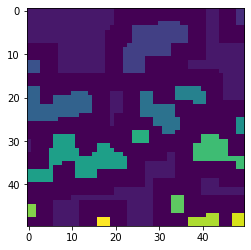

In [27]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.show()

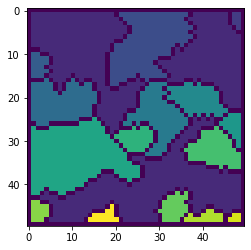

In [28]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()